# Pubg Data Science Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Task 1 : Read the dataset
data = pd.read_csv('pubg_data.csv')
df = data.head()
df

Id         groupId         matchId  assists  boosts  \
0  2f262dd9795e60  78437bcd91d40e  d5db3a49eb2955        0       0   
1  a32847cf5bf34b  85b7ce5a12e10b  65223f05c7fdb4        0       0   
2  1b1900a9990396  edf80d6523380a  1cadec4534f30a        0       3   
3  f589dd03b60bf2  804ab5e5585558  c4a5676dc91604        0       0   
4  c23c4cc5b78b35  b3e2cd169ed920  cd595700a01bfa        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0          0.0      0              0      0         92  ...        0   
1        163.2      1              1      0         42  ...        0   
2        278.7      2              1      8         16  ...        3   
3        191.9      1              0      0         31  ...        0   
4        100.0      1              0      0         87  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0           0.0          0           0.0          0               0   
1           0.0          0           0.0          0               0   
2           0.0          0           0.0          0               0   
3           0.0          0           0.0          0               0   
4           0.0          0           0.0          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0           0.0                0       1470        0.0000  
1         132.7                2       1531        0.2222  
2        3591.0               10          0        0.8571  
3         332.7                3          0        0.3462  
4         252.7                3       1557        0.0690  

[5 rows x 29 columns]

In [3]:
# Task 2 : Check the data types of all columns
data.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [4]:
# Task 3: Find the summary of all numerical columns and write your findings about it.
data.describe()

assists        boosts   damageDealt        DBNOs  headshotKills  \
count  10000.000000  10000.000000  10000.000000  10000.00000   10000.000000   
mean       0.234600      1.088500    129.211264      0.64400       0.221700   
std        0.575149      1.703279    167.193945      1.09562       0.577046   
min        0.000000      0.000000      0.000000      0.00000       0.000000   
25%        0.000000      0.000000      0.000000      0.00000       0.000000   
50%        0.000000      0.000000     83.805000      0.00000       0.000000   
75%        0.000000      2.000000    185.325000      1.00000       0.000000   
max        7.000000     18.000000   3469.000000     11.00000      14.000000   

              heals     killPlace    killPoints         kills   killStreaks  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       1.354000     47.663100    506.970200      0.913400      0.543800   
std        2.629102     27.424146    627.297959      1.524117      0.701948   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        0.000000     24.000000      0.000000      0.000000      0.000000   
50%        0.000000     48.000000      0.000000      0.000000      0.000000   
75%        2.000000     71.000000   1169.000000      1.000000      1.000000   
max       31.000000    100.000000   1926.000000     35.000000      4.000000   

       ...       revives  rideDistance     roadKills  swimDistance  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...      0.160200    600.693584      0.004200      4.385917   
std    ...      0.454045   1524.915601      0.074719     30.889620   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000575      0.000000      0.000000   
max    ...      5.000000  28780.000000      3.000000    971.200000   

          teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
count  10000.000000     10000.000000  10000.000000      10000.00000   
mean       0.024400         0.007700   1130.008410          3.63590   
std        0.171486         0.089674   1168.597983          2.42209   
min        0.000000         0.000000      0.000000          0.00000   
25%        0.000000         0.000000    151.575000          2.00000   
50%        0.000000         0.000000    650.350000          3.00000   
75%        0.000000         0.000000   1923.250000          5.00000   
max        3.000000         2.000000  10490.000000         41.00000   

        winPoints  winPlacePerc  
count  10000.0000  10000.000000  
mean     609.3440      0.469926  
std      739.7924      0.304508  
min        0.0000      0.000000  
25%        0.0000      0.200000  
50%        0.0000      0.458300  
75%     1495.0000      0.735100  
max     1863.0000      1.000000  

[8 rows x 25 columns]

In [5]:
# Task 4: the average pepole kills how many players
df = data['kills'].mean()
print('The average person kills other players are:',df)

The average person kills other players are: 0.9134


In [41]:
# Task 5: 99% of people have how many kills?
per_kill= np.percentile(data.kills, 99)
print('The 99 % of pepole have ', per_kill,'kills')
    


The 99 % of pepole have  7.0 kills


In [7]:
# Task 6: The most kills ever recorded are how much?
df = data['kills'].max()
print('The most kills ever recorded are :',df)

The most kills ever recorded are : 35


In [8]:
# Task 7: Print all the columns of the dataframe.
print(data.columns)

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')


The maximum time of match duration is between 1250 to 1500


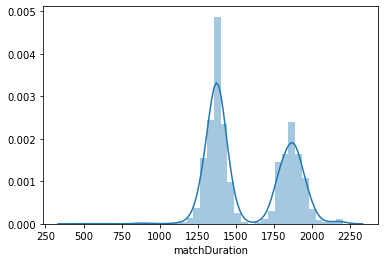

In [9]:
# Task 8 : Comment on distribution of the match's duration. Use seaborn.
sns.distplot(data['matchDuration']);
print('The maximum time of match duration is between 1250 to 1500')

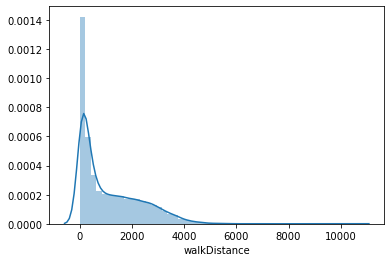

In [10]:
# Task 9 : Comment on distribution of the walk distance. Use seaborn.
sns.distplot(data['walkDistance']);

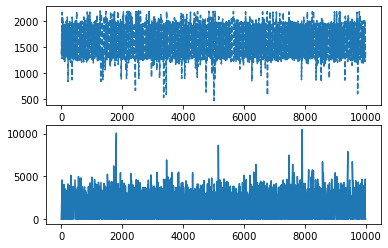

In [11]:
# Task 10 : Plot distribution of the match's duration vs walk distance one below the other
plt.style.use('fast')
plt.figure()
plt.subplot(2,1,1)
plt.plot(data['matchDuration'],'--')
plt.subplot(2,1,2)
plt.plot(data['walkDistance'],'-')

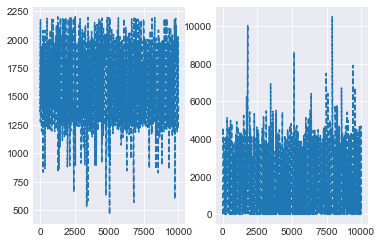

In [12]:
# Task 11 : Plot distribution of the match's duration vs walk distance side by side.
plt.style.use('seaborn-darkgrid')
plt.figure()
plt.subplot(1,2,1)
plt.plot(data['matchDuration'],'--')
plt.subplot(1,2,2)
plt.plot(data['walkDistance'],'--')


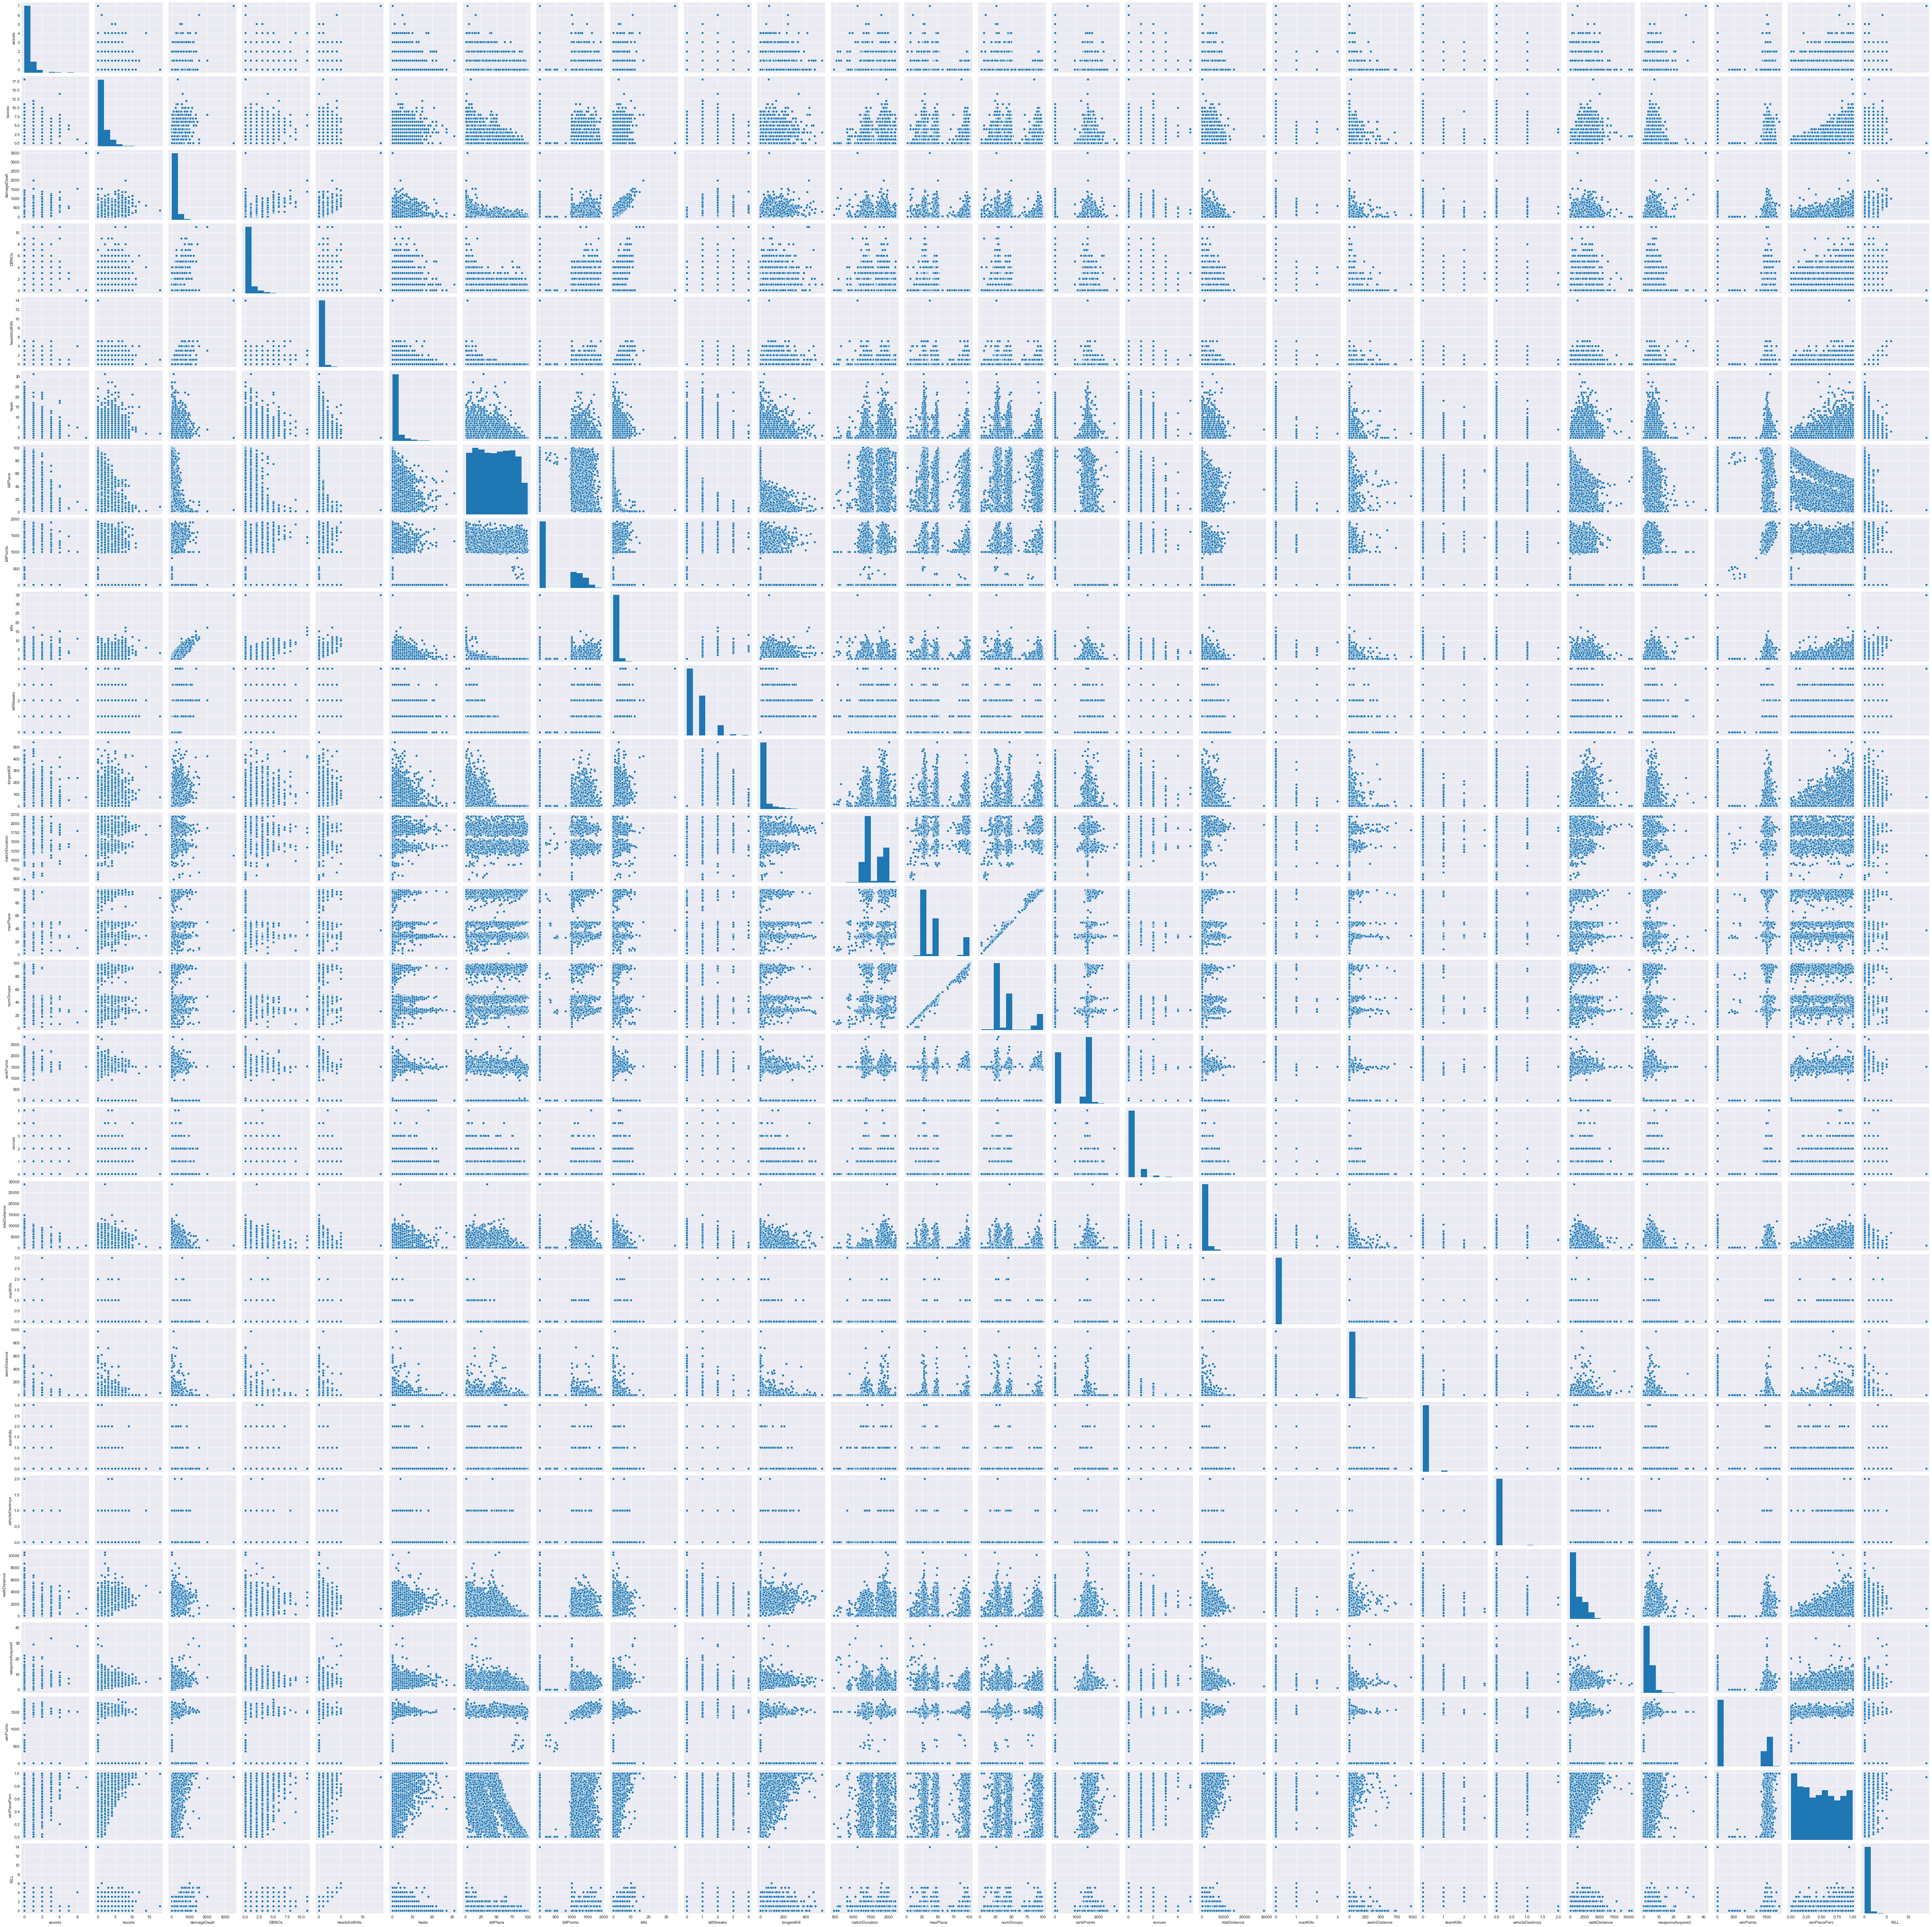

In [45]:
# Task 12 : Pairplot the dataframe. Comment on kills vs damage dealt, Comment on maxPlace vs numGroups.
sns.pairplot(data);

In [15]:
# Task 13 :How many unique values are there in 'matchType' and what are their counts?
unique_values = pd.unique(data['matchType'])
print("\nUnique value in matchType is :",unique_values)
number_of_unique_val = len(unique_values)
print("\nCount of unique value in matchType is :",number_of_unique_val)


Unique value in matchType is : ['squad-fpp' 'squad' 'duo-fpp' 'solo-fpp' 'duo' 'solo' 'crashfpp'
 'flaretpp' 'normal-squad-fpp' 'normal-duo-fpp' 'flarefpp' 'normal-squad'
 'normal-solo-fpp' 'crashtpp']

Count of unique value in matchType is : 14


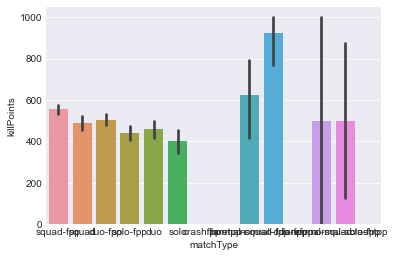

In [17]:
# Task 14 :Plot a barplot of ‘matchType’ vs 'killPoints'. Write your inferences.
sns.barplot(data['matchType'],data['killPoints']);

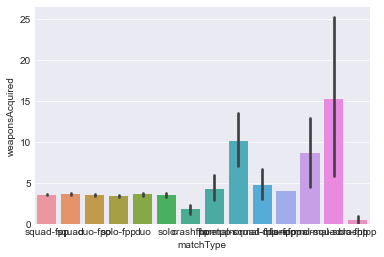

In [19]:
# Task 15 : Plot a barplot of ‘matchType’ vs ‘weaponsAcquired’. Write your inferences
sns.barplot(data['matchType'],data['weaponsAcquired']);

In [23]:
# Task 16 : Find the Categorical columns.
category_column = data.select_dtypes('category').columns
category_column

Index([], dtype='object')

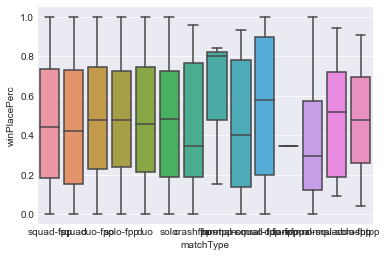

In [25]:
# Task 17 : Plot a boxplot of ‘matchType’ vs ‘winPlacePerc’. Write your inferences.
sns.boxplot(data['matchType'],data['winPlacePerc']);

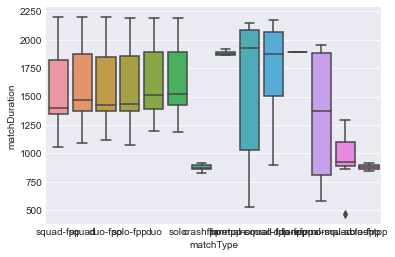

In [27]:
# Task 18 : Plot a boxplot of ‘matchType’ vs ‘matchDuration’. 
sns.boxplot(data['matchType'],data['matchDuration']);

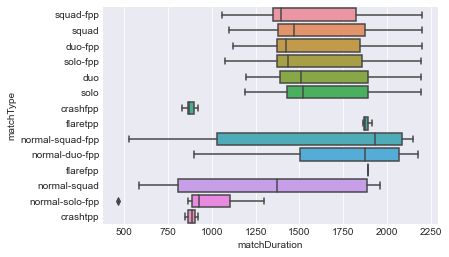

In [30]:
 # Task 19 : Change the orientation of the above plot to horizontal.
sns.boxplot(data['matchDuration'],data['matchType']);

In [32]:
# Task 20 : Add a new column called ‘KILL’ which contains the sum of following columns viz. headshotKills,teamKills, roadKills.
data['KILL'] = data['headshotKills'] + data['teamKills'] + data['roadKills']
data.head()

Id         groupId         matchId  assists  boosts  \
0  2f262dd9795e60  78437bcd91d40e  d5db3a49eb2955        0       0   
1  a32847cf5bf34b  85b7ce5a12e10b  65223f05c7fdb4        0       0   
2  1b1900a9990396  edf80d6523380a  1cadec4534f30a        0       3   
3  f589dd03b60bf2  804ab5e5585558  c4a5676dc91604        0       0   
4  c23c4cc5b78b35  b3e2cd169ed920  cd595700a01bfa        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  rideDistance  \
0          0.0      0              0      0         92  ...           0.0   
1        163.2      1              1      0         42  ...           0.0   
2        278.7      2              1      8         16  ...           0.0   
3        191.9      1              0      0         31  ...           0.0   
4        100.0      1              0      0         87  ...           0.0   

   roadKills  swimDistance  teamKills  vehicleDestroys walkDistance  \
0          0           0.0          0                0          0.0   
1          0           0.0          0                0        132.7   
2          0           0.0          0                0       3591.0   
3          0           0.0          0                0        332.7   
4          0           0.0          0                0        252.7   

   weaponsAcquired  winPoints  winPlacePerc  KILL  
0                0       1470        0.0000     0  
1                2       1531        0.2222     1  
2               10          0        0.8571     1  
3                3          0        0.3462     0  
4                3       1557        0.0690     0  

[5 rows x 30 columns]

In [34]:
#  Task 21 Round off column ‘winPlacePerc’ to 2 decimals.
data['winPlacePerc'] = round(data['winPlacePerc'],2)
data.head()

Id         groupId         matchId  assists  boosts  \
0  2f262dd9795e60  78437bcd91d40e  d5db3a49eb2955        0       0   
1  a32847cf5bf34b  85b7ce5a12e10b  65223f05c7fdb4        0       0   
2  1b1900a9990396  edf80d6523380a  1cadec4534f30a        0       3   
3  f589dd03b60bf2  804ab5e5585558  c4a5676dc91604        0       0   
4  c23c4cc5b78b35  b3e2cd169ed920  cd595700a01bfa        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  rideDistance  \
0          0.0      0              0      0         92  ...           0.0   
1        163.2      1              1      0         42  ...           0.0   
2        278.7      2              1      8         16  ...           0.0   
3        191.9      1              0      0         31  ...           0.0   
4        100.0      1              0      0         87  ...           0.0   

   roadKills  swimDistance  teamKills  vehicleDestroys walkDistance  \
0          0           0.0          0                0          0.0   
1          0           0.0          0                0        132.7   
2          0           0.0          0                0       3591.0   
3          0           0.0          0                0        332.7   
4          0           0.0          0                0        252.7   

   weaponsAcquired  winPoints  winPlacePerc  KILL  
0                0       1470          0.00     0  
1                2       1531          0.22     1  
2               10          0          0.86     1  
3                3          0          0.35     0  
4                3       1557          0.07     0  

[5 rows x 30 columns]

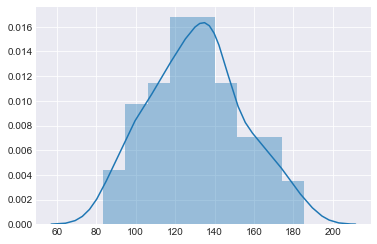

In [44]:
# Task 22 Take a sample of size 50 from the column damageDealt for 100 times and calculate its mean. Plot it on a histogram and comment on its distribution.
x = []
for i in range(100):
    x.append(data['damageDealt'].sample(50).mean())
means = np.array(x)
sns.distplot(means);